How strong will be the concrete mixture? Can you estimate it while creating it? A seasoned civil engineer will know the winning mixture by heart! He/she will understand what should be the right amount of water, ash, cement etc. should be mixed in order to create a high strength concrete mixture.

In this case study, your task is to create a machine learning model which can predict the future strength of a concrete, based on its components and the time for which it is dried.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production
* I know its a long list!! Take a deep breath... and let us get started!#supressing warning signs




# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "ConcreteStrengthData.csv". This file contains 1005 concrete mixture combinations.

You can download the data required for this case study here

Data description
The business meaning of each column in the data is as below

* CementComponent: How much cement is mixed
* BlastFurnaceSlag: How much Blast Furnace Slag is mixed
* FlyAshComponent: How much FlyAsh is mixed
* WaterComponent: How much water is mixed
* SuperplasticizerComponent: How much Super plasticizer is mixed
* CoarseAggregateComponent: How much Coarse Aggregate is mixed
* FineAggregateComponent: How much Coarse Aggregate is mixed
* AgeInDays: How many days it was left dry
* Strength: What was the final strength of concrete

In [2]:
#Reading the dataset
import pandas as pd
import numpy as np


concrete=pd.read_csv("/Users/shubhamyadav/Desktop/FARUKH SIR IVY/DATASETS/Python Datasets/Regression Datasets/ConcreteStrengthData.csv",
                     encoding="latin")

print("Shape before deleting duplicate values :",concrete.shape)

#Dropping Duplicates
concrete=concrete.drop_duplicates()
print("Shape after dropping duplicates :",concrete.shape)

Shape before deleting duplicate values : (1030, 9)
Shape after dropping duplicates : (1005, 9)


# Defining the problem statement:
Create a ML model which can predict the Strength of concrete
* Target Variable: Strength
* Predictors: water, cement, ash, days to dry etc.
Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

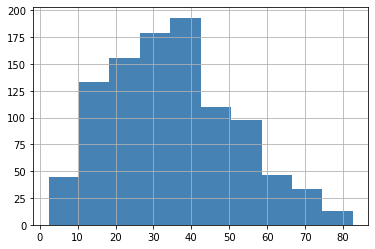

In [157]:
#distribution of the target variable

concrete["Strength"].hist(color="steelblue")



The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the Strength of the concrete? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous# Basic data exploration
* concrete.info()

In [5]:
concrete.describe(include="all")

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous

concrete.nunique()

CementComponent              278
BlastFurnaceSlag             185
FlyAshComponent              156
WaterComponent               195
SuperplasticizerComponent    111
CoarseAggregateComponent     284
FineAggregateComponent       302
AgeInDays                     14
Strength                     845
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* CementComponent: Continuous. Selected.
* BlastFurnaceSlag: Continuous. Selected.
* FlyAshComponent: Continuous. Selected.
* WaterComponent: Continuous. Selected.
* SuperplasticizerComponent: Continuous. Selected.
* CoarseAggregateComponent: Continuous. Selected.
* FineAggregateComponent: Continuous. Selected.
* AgeInDays: Continuous. Selected.
* Strength: Continuous. Selected. This is the Target Variable!

# Removing useless columns from the data
* There are no qualitative columns in this data


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram


# Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted no categorical predictors in the data

Categorical Predictors:

There are no categorical predictors in this data

# Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are eight continuous predictor variables 
CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays

In [11]:
# Selected Continuous Variables:

# CementComponent  : Selected. The distribution is good.
# BlastFurnaceSlag: Selected. The distribution is good.
# FlyAshComponent: Selected. The distribution is good.
# WaterComponent: Selected. The distribution is good.
# SuperplasticizerComponent: Selected. The distribution is good.
# CoarseAggregateComponent: Selected. The distribution is good.
# FineAggregateComponent: Selected. The distribution is good.
# AgeInDays: Selected. The distribution is skewed, but the tail is thick, hence acceptable.


# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

No outliers in this data.

In [13]:
#missing value treatment

concrete.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

# Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
 
Continuous Target Variable Vs Continuous Predictor
Continuous Target Variable Vs Categorical Predictor



# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

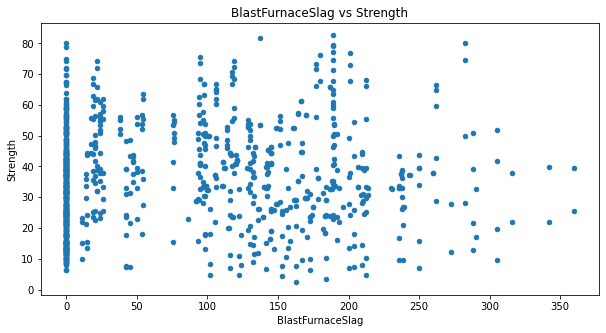

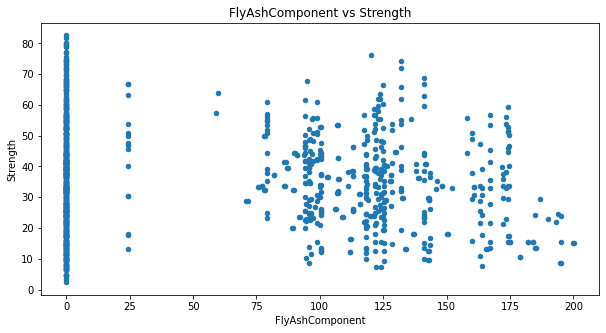

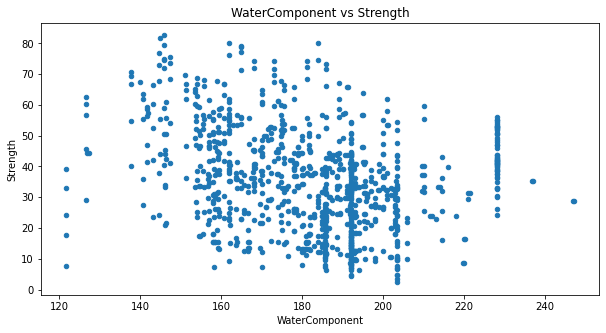

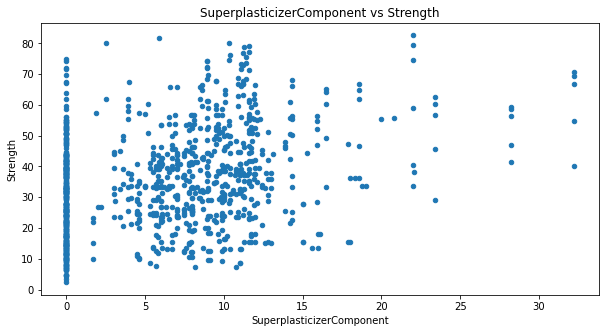

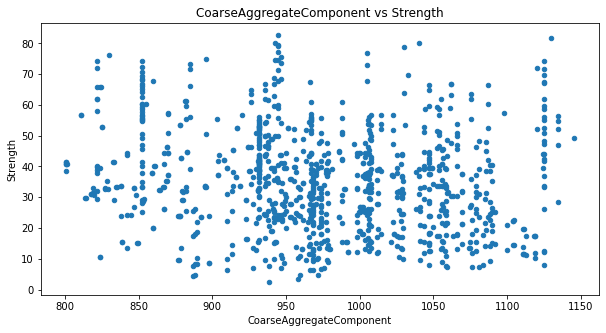

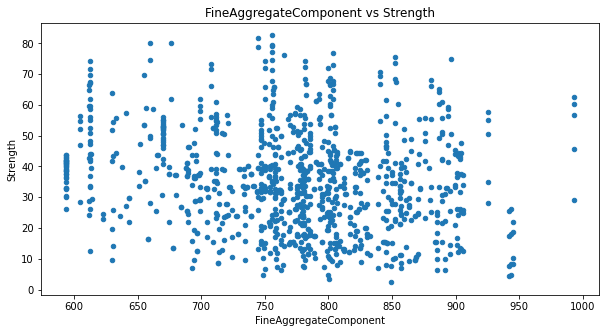

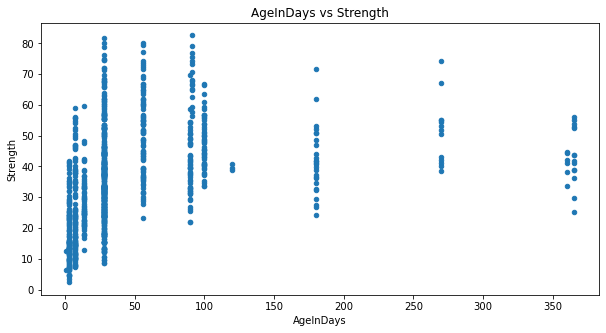

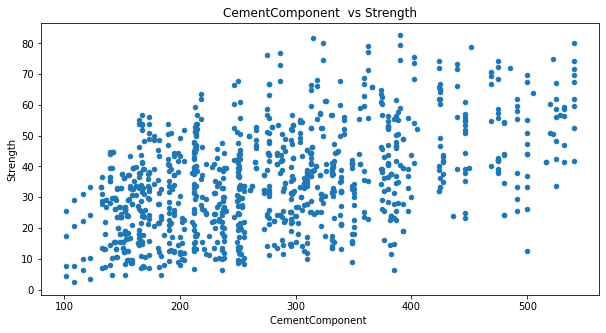

In [16]:
#visual exploration scatter plot

continouscolumns=["BlastFurnaceSlag","FlyAshComponent","WaterComponent","SuperplasticizerComponent","CoarseAggregateComponent",
        "FineAggregateComponent","AgeInDays",'CementComponent ']

for predictors in continouscolumns:
    concrete.plot.scatter(x=predictors,y="Strength",figsize=(10,5),title=(predictors+' vs '+'Strength'))
                  
            



# Scatter charts interpretation
What should you look for in these scatter charts?

* Trend. You should try to see if there is a visible trend or not. There could be three scenarios

* Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

* Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

* No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

In [172]:
#statistical feature selection (correlation matrix)

#correlation b/w [-1,0) means inversely proportional shows downward trend
#correlation b/w (0,1] means directly proportional shows upward trend
#correaltion (0) means no trends
                
                 
#correaltion vaue>0.5 no matter the sign it means it is correalted and good for the ml model 
                 

In [18]:
continouscolumns=["BlastFurnaceSlag","FlyAshComponent","WaterComponent","SuperplasticizerComponent","CoarseAggregateComponent",
                  "FineAggregateComponent","AgeInDays",'CementComponent ','Strength']
                  

correlationvalues=concrete[continouscolumns].corr()
correlationvalues

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,CementComponent,Strength
BlastFurnaceSlag,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,-0.303324,0.103374
FlyAshComponent,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.385610,-0.080648
WaterComponent,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.056625,-0.269624
SuperplasticizerComponent,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.060906,0.344209
CoarseAggregateComponent,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.086205,-0.144717
FineAggregateComponent,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.245375,-0.186448
AgeInDays,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.086348,0.337367
CementComponent,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,1.000000,0.488283
Strength,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,0.488283,1.000000


In [19]:
#selecting values >0.5 in magnitude no matter the sign (here reduced it to 0.3 since very less values were near 0.5)

correlationvalues["Strength"][abs(correlationvalues['Strength'])>0.3]

SuperplasticizerComponent    0.344209
AgeInDays                    0.337367
CementComponent              0.488283
Strength                     1.000000
Name: Strength, dtype: float64

In [20]:
selected_continous_columns=["SuperplasticizerComponent",'CementComponent ','AgeInDays']

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

There are no categorical columns in this data.




# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [22]:
#SELECTING FINAL PREDICTORS

dataforml=concrete[selected_continous_columns]

dataforml.head()

,SuperplasticizerComponent,CementComponent,AgeInDays
0,2.5,540.0,28
1,2.5,540.0,28
2,0.0,332.5,270
3,0.0,332.5,365
4,0.0,198.6,360


In [23]:
#saving the pickle files which later can be used during model deployment

dataforml.to_pickle('dataforml.pkl')

# Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
In this data there is no Ordinal categorical variable which is in string format.

In [24]:
#datapreprocessing

#converting nominal category into 1/0 mapping
#converting nominal variable to numeric using get dummies mapping
#data transformation such as standardscaler,minmaxscaler 
dataformlnumeric=pd.get_dummies(dataforml)
dataformlnumeric["Strength"]=concrete["Strength"]
dataformlnumeric


,SuperplasticizerComponent,CementComponent,AgeInDays,Strength
0,2.5,540.0,28,79.99
1,2.5,540.0,28,61.89
2,0.0,332.5,270,40.27
3,0.0,332.5,365,41.05
4,0.0,198.6,360,44.30
...,...,...,...,...
1025,8.9,276.4,28,44.28
1026,10.4,322.2,28,31.18
1027,6.1,148.5,28,23.70
1028,11.3,159.1,28,32.77


In [52]:
# splitting the data into training and testing


targetcolumn=["Strength"]
predictorcolumns=["SuperplasticizerComponent",'CementComponent ','AgeInDays']



X=dataformlnumeric[predictorcolumns].values
y=dataformlnumeric[targetcolumn].values



from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=428,test_size=0.3)




In [26]:
#standardisation/normalisation of data 

from sklearn.preprocessing import MinMaxScaler
predictorscaler=MinMaxScaler()

predictorscalerfit=predictorscaler.fit(X)
X=predictorscalerfit.transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [27]:
#checking number of rows and columns
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(703, 3)
(302, 3)
(703, 1)
(302, 1)


In [28]:
#mulitple linear regression

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
LREG=reg.fit(X_train,y_train)
prediction=LREG.predict(X_test)

#calculating goodness of fit
from sklearn import metrics
print("R2 score:",metrics.r2_score(y_train,LREG.predict(X_train)))


print("\n##############    MODEL ACCURACY AND PREDICTION VALUES    #############")

testingsampledata=pd.DataFrame(data=X_test,columns=predictorcolumns)
testingsampledata["STRENGTH"]=y_test
testingsampledata["PREDICTED STRENGTH"]=np.round(prediction)


testingsampledata["APE"]=100*(abs((testingsampledata["STRENGTH"]-testingsampledata["PREDICTED STRENGTH"]))/testingsampledata["STRENGTH"])

print(testingsampledata[["STRENGTH","PREDICTED STRENGTH","APE"]].head())

MAPE=np.mean(testingsampledata["APE"])
MEDIANMAPE=np.median(testingsampledata["APE"])

ACCURACY=100-MAPE
MEDIANACCURACY=100-MEDIANMAPE

print("\nMean accuracy of the data ",ACCURACY)
print("Median accuracy of the data ",MEDIANACCURACY)

#defining the function to determine the accuracy

def accuracy(original,prediction):
    mape=np.mean(100*(abs((original-prediction))/original))
    accuracy=100-mape
    return(accuracy)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(accuracy,greater_is_better=True)


from sklearn.model_selection import cross_val_score
accuracy_values=cross_val_score(reg,X,y,cv=10,scoring=custom_scoring)
print("\nAccuracy values for 10 fold cross validation",accuracy_values)
print("Final average accuracy of the model",np.round(np.mean(accuracy_values),2))

R2 score: 0.4890314771936314

##############    MODEL ACCURACY AND PREDICTION VALUES    #############
   STRENGTH  PREDICTED STRENGTH        APE
0     19.01                27.0  42.030510
1     24.29                16.0  34.129271
2     26.32                24.0   8.814590
3     34.57                38.0   9.921898
4     44.13                45.0   1.971448

Mean accuracy of the data  60.49351199213498
Median accuracy of the data  75.08504661930615

Accuracy values for 10 fold cross validation [66.11624942 68.98716338 66.13454779 66.25073037 70.39528526 48.94465308
 41.5930605  57.14493174 63.19198007 62.96157721]
Final average accuracy of the model 61.17


In [29]:
#Decision Tree
X_test.shape

(302, 3)

DecisionTreeRegressor(max_depth=6)
R2 score: 0.8105225777001817

##############    MODEL ACCURACY AND PREDICTION VALUES    #############
   STRENGTH  PREDICTED STRENGTH        APE
0     26.94                39.0  44.766147
1     31.25                39.0  24.800000
2     32.72                21.0  35.819071
3     33.42                39.0  16.696589
4     54.90                48.0  12.568306

Mean accuracy of the data  77.36076984122826
Median accuracy of the data  81.85705342148188

Accuracy values for 10 fold cross validation [57.38431573 28.08311317 38.51349065 37.69747072 55.28849664 22.72198879
  3.01593952 26.83684976 46.33677619 44.33006037]
Final average accuracy of the model 36.02


<AxesSubplot:>

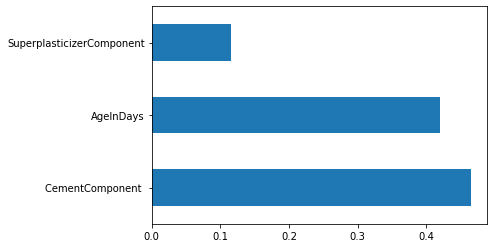

In [72]:
from sklearn.tree import DecisionTreeRegressor
Regmodel=DecisionTreeRegressor(max_depth=6,criterion='mse')
DT=Regmodel.fit(X_train,y_train)
print(Regmodel)
predictionS=DT.predict(X_test)

#calculating goodness of fit
from sklearn import metrics
print("R2 score:",metrics.r2_score(y_train,DT.predict(X_train)))


print("\n##############    MODEL ACCURACY AND PREDICTION VALUES    #############")

testingsampledata=pd.DataFrame(data=X_test,columns=predictorcolumns)
testingsampledata["STRENGTH"]=y_test
testingsampledata["PREDICTED STRENGTH"]=np.round(predictionS)


testingsampledata["APE"]=100*(abs((testingsampledata["STRENGTH"]-testingsampledata["PREDICTED STRENGTH"]))/testingsampledata["STRENGTH"])

print(testingsampledata[["STRENGTH","PREDICTED STRENGTH","APE"]].head())

MAPE=np.mean(testingsampledata["APE"])
MEDIANMAPE=np.median(testingsampledata["APE"])

ACCURACY=100-MAPE
MEDIANACCURACY=100-MEDIANMAPE

print("\nMean accuracy of the data ",ACCURACY)
print("Median accuracy of the data ",MEDIANACCURACY)

#defining the function to determine the accuracy

def accuracy(original,prediction):
    mape=np.mean(100*(abs((original-prediction))/original))
    accuracy=100-mape
    return(accuracy)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(accuracy,greater_is_better=True)


from sklearn.model_selection import cross_val_score
accuracy_values=cross_val_score(Regmodel,X,y,cv=10,scoring=custom_scoring)
print("\nAccuracy values for 10 fold cross validation",accuracy_values)
print("Final average accuracy of the model",np.round(np.mean(accuracy_values),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=predictorcolumns)
feature_importances.nlargest(10).plot(kind='barh')


In [131]:
# Adding graphviz path to the PATH env variable
testingsampledata
# Try to find "dot.exe" in your system and provide the path of that folder
#import os
#os.environ["PATH"] += os.pathsep + 'C:\\Users\\fhashmi\\AppData\\Local\\Continuum\\Anaconda3\\Library\\bin\\graphviz'

,SuperplasticizerComponent,CementComponent,AgeInDays,STRENGTH,PREDICTED STRENGTH,APE
0,0.0,254.0,90.0,26.94,39.0,44.766147
1,0.0,277.0,90.0,31.25,39.0,24.800000
2,3.4,145.9,28.0,32.72,21.0,35.819071
3,6.0,304.0,28.0,33.42,39.0,16.696589
4,32.2,469.0,7.0,54.90,48.0,12.568306
...,...,...,...,...,...,...
297,10.0,322.0,28.0,31.18,39.0,25.080180
298,10.1,313.8,28.0,38.46,39.0,1.404056
299,14.2,252.3,56.0,55.83,61.0,9.260254
300,10.2,213.7,56.0,46.64,48.0,2.915952


In [66]:
#from ipython.display import image
#from sklearn import tree
#import pydotplus
#
#dot_data=tree.export.graphviz=(Regmodel,out_file=None,
#                               feature_names=predictorcolumns,class_names=Targetcolumn)
#
#graph = pydotplus.graph_from_dot_data(dot_data)
#
## Show graph
#Image(graph.create_png(), width=500,height=500)         

In [81]:
#deployment of the model

# going with decisiontreeregressor()

#1 seperate target variable and predictor variable

targetcolumn=["Strength"]

#selecting final set of predictors for deployment
predictorcolumns=["SuperplasticizerComponent",'CementComponent ','AgeInDays']

X=dataformlnumeric[predictorcolumns].values
y=dataformlnumeric[targetcolumn].values


from sklearn.preprocessing import MinMaxScaler
predictorscaler=MinMaxScaler()
predictorscalerfit=predictorscaler.fit(X)
X=predictorscalerfit.transform(X)

print(X.shape)
print(y.shape)

(1005, 3)
(1005, 1)


In [97]:
#Retraining the model using 100% data

from sklearn.linear_model import LinearRegression
regs=LinearRegression()
finaldtmodel=regs.fit(X,y)


In [99]:
#CROSSVALIDATING THE FINAL TRAINED MODEL
from sklearn.model_selection import cross_val_score
accuracy_values=cross_val_score(finaldtmodel,X,y,cv=10,scoring=custom_scoring)
print("\nAccuracy values for 10 fold cross validation",accuracy_values)
print("\nFinal average accuracy of the model",round(accuracy_values.mean(),2))


Accuracy values for 10 fold cross validation [66.11624942 68.98716338 66.13454779 66.25073037 70.39528526 48.94465308
 41.5930605  57.14493174 63.19198007 62.96157721]

Final average accuracy of the model 61.17


In [102]:
#saving the pickle file for the model created

import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('finaldtmodel.pkl', 'wb') as fileWriteStream:
    pickle.dump(finaldtmodel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /Users/shubhamyadav/Desktop/PROJECTS


In [152]:
#creating python function which can be called from any tool

def functionpredictresult(inpdata):
    import pandas as pd
    num_input=inputdata.shape[0]
    
    #appending new data with the training data
    dataforml=pd.read_pickle('dtforml.pkl')
    inputdata=inputdata.append(dataforml)
    
    #generating dummy 
    inputdata=inputdata.get_dummies(inputdata)
    
    
    #maintaining same set of orders of the columns
    predictorcolumns=["SuperplasticizerComponent",'CementComponent ','AgeInDays']
    
    X=inputdata[predictorcolumns].values[0:numinput]
    
    X=predictorscaler.transform(X)
    # Loading the Function from pickle file
    import pickle
    with open('finaldtmodel.pkl', 'rb') as fileReadStream:
        predictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
    prediction=predictionmodel.predict(X)
    predictionresult=pd.DataFrame(data=prediction,column=["PREDICTED"])
    return(round(predictionresult))
                                  
    
        

    # This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('dataforml.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['SuperplasticizerComponent','CementComponent ',  'AgeInDays']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=predictorscalerfit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('finaldtmodel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Generating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Strength'])
    return(round(PredictionResult))

In [156]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
[[540,2.5,28],
     [332,5.0,300]],
columns=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)


   CementComponent   SuperplasticizerComponent  AgeInDays
0               540                        2.5         28
1               332                        5.0        300


,Predicted Strength
0,47.0
1,62.0
